# Chapter 2. Physics of Sports and Machine Learning

> "No great discovery was ever made without a bold guess."\
> Isaac Newton

![](images/ch2/fig_2-1.PNG)

Overview
========

This chapter provides an overview of physical principles used in modern sport science. In addition to physics, kinesiology and biomechanics, we will also discuss how deep learning can help a sport data scientist, and vice versa, how we can improve our models by knowing a few physics principles. Classical mechanics is a reliable method of movement analysis, and it's a valuable tool if you're planning to build any practical sports machine learning models. In this chapter I'll show how machine learning models, including neural nets and reinforcement learning can be applied to biomechanics.

The classical biomechanical approach to sport movement analysis implies laws of physics. Essentially, those are principles our science learned from the Universe through centuries of research or smart guesses, like Newton's apple. How can machine learning and modern data science help? In machine learning we train our model to *learn* rules, based on the data that we provide as a training set. Using our knowledge of laws of physics also helps validating and training our models. This idea inspired, for example research around PGNN (Physics Guided Neural Net): the idea that a typical loss function can be combined with finding a physical inconsistency.

Can machine learning be combined with biomechanics to provide that 'shortcut' inferred from centuries of learning laws of physics? Absolutely! In this chapter I'll show some practical examples on how this can be achieved. Just like in data science, when transfer learning is used, our model would benefit from knowledge transfer from physics. In fact, there's already research that uses neural networks to discover physical laws and compress them into simple representation, such as differential equations. There're many opportunities in combining our knowledge of physics with machine learning, let's go over the fundamental principles of physics used in sport science.

Mechanics
=========

Motion is sports can be described by mechanical models. A course of kinesiology includes biomechanics, science that applies mechanical models and laws to analyze human body movement. Mechanics involves studying motion of rigid bodies, solids and deformable bodies and fluids. Biomechanics is primarily concerned with physics of human body and movement, and includes the following areas:

-   **Kinematics** describes effects of linear and angular motion: velocity, displacement, acceleration and position.

-   **Kinetics** explains what causes motion: forces, torque and moments.

-   **Work, Energy and Power** are areas where physics helps sports science determine efficiency, calories spend and fatigue.

-   **Skeletal, joint and muscular mechanics** of body tissues, joints and the human frame studies interaction between body parts, stress and strain (this area immediate application to body pose estimation in machine learning).

An experienced sport scientist can use biomechanics to provide movement analysis for any sport. Any coach can use these models because we all know physics from school.

Kinetics: Explaining Motion
===========================

In this section I'll show you some applications of linear and angular kinetics of rigid bodies in sports. To make it interactive and fun, the accompanying Jupyter Notebook contains Python code you can follow to run and visualize examples.

First Law of Motion (Law of Inertia)
------------------------------------

The first law of motion says that if a body is at rest or moves at a constant speed, it will remain at rest or keep moving at a constant speed in a straight line, unless it is acted upon by a force.

In physics, the concept of momentum was introduced before Newton by Descartes, meaning the amount of motion. The definition of momentum is the product of the mass of the body to its velocity. The unit of momentum in international system of units (SI) is kg\*m/s:

$$momentum = mass*\ velocity$$

$$p = mv$$

![](images/ch2/fig_2-2.PNG)

Figure 2--2 How much force does it take to stop a running football player?

In football, a collision occurs when a tackler stops a running quarterback. Let's say the mass of a quarterback is 100 kg, and his speed 5 m/s. Then the momentum of the quarterback from the first law of motion is 500 kg\*m/s:

In [1]:
m = 100. # kg
v = 5. # m/s

# Momentum of a football runner
p = m * v
print(f'Momentum {p} kg*m/s')

Momentum 500.0 kg*m/s


The impulse it takes for a tackler to stop a quarterback is defined by the speed and time of collision. Let's say the tackle occurs to full stop, when the speed is zero, and the time of collision is half a second, then the impulse:

In [3]:
v1 = 0. # m/s
dt = 0.5 # s

# F=ma or F=m*dv/dt
# F*dt = m*dv

# Impulse to stop a quarterback
dv = v1-v
I = m * dv * dt
print(f'Impulse to stop {I} N*s')



Impulse to stop -250.0 N*s


Second Law of Motion
--------------------

Newton's Second Law relates acceleration of a body with an external force F acting on it:

$force = mass*\ acceleration$

$F = ma$

The unit of force is Newtons (N) = kg\*m/s\^2. In our earlier example, the force with which the tackler acts on the quarterback is:

In [4]:
# Force exherted by tackler on the quarterback
F = m * dv / dt
print(f'Force {F} N')

Force -1000.0 N


Note, that in this example, acceleration is implied by using the time derivative of velocity. Since acceleration is the rate of change of velocity, the Second Law also means that force is the rate of change of momentum.

Third Law of Motion
-------------------

For every action there's an equal and opposite reaction. For example, when a player hits the volleyball, the ball reacts with an equal force on the player.

![](images/ch2/fig_2-3.PNG)

The laws of motion introduced earlier, can also be expressed for rotation, or angular movement. Many sports use angular motion: spinning, swinging movements. Same mechanical laws apply for angular motion, but instead of forces we use toque, linear displacement becomes angular displacement etc.

Kinematics: Projectile Motion
=============================

Sports often involve projectiles: for example, javelin, balls, jumpers etc. Projectile is any object that is released with initial velocity and is subject to forces of gravity and air resistance.

![](images/ch2/fig_2-4.PNG)

In sports, javelin and discus were included in Olympic sports since the original ancient Olympic games, dating back to 776 BC. The flight of both javelin and discus is an application of both kinematics, because it can be described by projectile motion, and aerodynamics.

The factors of kinematics for projectile are release speed, release angle and release height. The aerodynamics effect comes from the lift during the flight and air resistance. The aerodynamics factors are angle of attack and wind speed.

In this example I'll focus on kinematics aspects of the motion, my goal is to show how physics can be combined with machine learning effectively and used in practical sports applications. A projectile displacement along horizontal and vertical axes can be determined as:

$${x = v_{0}t\cos\alpha}$$
$${y = v_{0}t\sin{\alpha + \frac{1}{2}gt^{2}} }$$

Given release speed *v*, release angle $\alpha$, release height *h,* the range of a projectile can be calculated using the formula:

$$x = \ \frac{v^{2}}{2g}\ \sin{2\alpha}\left( 1 + \ \sqrt{1 + \ \frac{2gh}{v^{2}\sin\alpha}} \right)$$

or, when the projectile is launched at the ground (i.e. h=0),

$$x = \ \frac{v^{2}}{2g}\ \sin{2\alpha}$$

Formula 2-1 Projectile range when launched from the ground

# Project: Calculate and plot a projectile trajectory and find best range and release angle

In this project we'll find an optimal angle of release for an athlete throwing a projectile. Let's assume the release speed of a projectile at 30 m/s and for simplicity it's released at the ground. To test various angles of release, we'll create a list of test angles from 20 to 50 degrees spaced at 5 degrees:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g = 9.81 # m/s^2
v = 30 # release speed m/s
angles = np.arange(20, 55, 5)

def projectile(angle, t):
    x = []
    y = []
    for dt in t:
        xt = ((v*dt)*np.cos(angle)) 
        yt = ((v*dt)*np.sin(angle))-((0.5*g)*(dt**2))
        if yt > 0:
            x.append(xt)
            y.append(yt)
    return x,y

Finally, to plot the results and iterate through test angles finding the best angle, determined by maximum horizontal displacement:

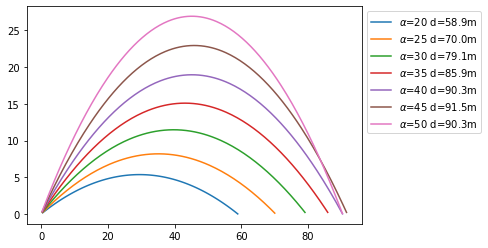

max distance: 91.5m angle=45.0


In [2]:
max_distance = 0
best_angle = None
t = np.linspace(0, 5, 300)
for angle in angles: 
    x,y=projectile(angle*np.pi/180, t)
    distance = x[-1]
    if max_distance < distance:
        max_distance = distance
        best_angle = angle
    plt.plot(x, y, label=r"$\alpha$"+f"={angle:.0f} d={distance:.1f}m") 
    plt.legend(bbox_to_anchor=(1, 1))

plt.show()
print(f"max distance: {max_distance:.1f}m angle={best_angle:.1f}")

# Project. Train a neural network to predict a projectile range

We can also train a machine learning model to predict projectile range. In machine learning finding a continuous value is a problem of regression. We will use Keras to build the model, and Scikit-learn to generate a dataset for training. Since we know the formula for the range of projectile (see Formula 2-1), generating a training dataset should be easy:

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

g = 9.81

def generate_data(size=1000):
    v = np.random.uniform(5, 35, size) # m/s
    alpha = np.random.uniform(20,60, size) # degrees, angle
    projectile_range = [np.power(v,2)*np.sin(np.deg2rad(2*alpha)) / g]
    y = np.reshape(projectile_range, (size, 1))
    return train_test_split(np.vstack([v,alpha]).transpose(), y, test_size=0.2, random_state=42)

X_train, X_test, Y_train, Y_test = generate_data()

I set the dataset size to 1000 by default, release speed is in range 5-35 m/s, release angle 20-60 degrees. Resulting data is automatically split into training and test set, the input X is an array with rows containing release speed and release angle values, and the output contains predicted range:

In [8]:
print(f"Input set: {X_train.shape} sample value: {X_train[0]}")
print(f"Predicted set: {Y_train.shape} sample value: {Y_train[0]}")

Input set: (800, 2) sample value: [34.38954536 57.37380989]
Predicted set: (800, 1) sample value: [109.48295258]


Next step is building a network in Keras to predict the projectile range. I used a simple network with two hidden layers, and the last layer is a linear layer with no activation. MSE loss function is used a lot in regression models. The MAE (mean absolute error) metric is the value difference between the predictions and the targets. For example a MAE of 0.99 means that you are off by 99 centimeters from the target range:

In [19]:
from keras import models
from keras import layers
from keras import callbacks

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
  

Now the network is build, let's train it! The best model will be saved in projectile.hdf5 file.

In [21]:
model = build_model()
checkpoint = callbacks.ModelCheckpoint(filepath="projectile.hdf5", verbose=1, save_best_only=True)
model.fit(X_train, Y_train, epochs=500, batch_size=10, callbacks=[checkpoint])
score = model.evaluate(X_test, Y_test)
Y_pred = model.predict(X_test)
print('Score:', score)




Epoch 1/500





800/800 [==============================] - 1s 983us/step - loss: 804.7435 - mean_absolute_error: 22.1535
Epoch 2/500
800/800 [==============================] - 0s 140us/step - loss: 192.6858 - mean_absolute_error: 11.3954
Epoch 3/500
300/800 [==========>...................] - ETA: 0s - loss: 140.5159 - mean_absolute_error: 9.2322 

C:\ProgramData\Anaconda3\envs\rl\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


800/800 [==============================] - 0s 201us/step - loss: 134.7567 - mean_absolute_error: 9.0314
Epoch 4/500
800/800 [==============================] - 0s 179us/step - loss: 126.6879 - mean_absolute_error: 8.5874
Epoch 5/500
800/800 [==============================] - 0s 158us/step - loss: 123.1336 - mean_absolute_error: 8.4167
Epoch 6/500
800/800 [==============================] - 0s 141us/step - loss: 119.6960 - mean_absolute_error: 8.3334
Epoch 7/500
800/800 [==============================] - 0s 201us/step - loss: 117.5343 - mean_absolute_error: 8.1332
Epoch 8/500
800/800 [==============================] - 0s 176us/step - loss: 115.9178 - mean_absolute_error: 8.0482
Epoch 9/500
800/800 [==============================] - 0s 196us/step - loss: 111.6828 - mean_absolute_error: 7.9424
Epoch 10/500
800/800 [==============================] - 0s 193us/step - loss: 110.2635 - mean_absolute_error: 7.8287
Epoch 11/500
800/800 [==============================] - 0s 180us/step - loss: 107.8

The best score is within a meter from the projectile formula, just to make sure let's check results from the model with the actual formula (your results may vary as dataset generation for model training is random):

In [22]:
angle = 45
speed = 30
prediction = model.predict(np.array([(speed,angle)]))
actual = speed**2*np.sin(np.deg2rad(2*angle)) / g
print(f"{speed}/{angle} prediction: {prediction} actual: {actual}")

30/45 prediction: [[91.18884]] actual: 91.74311926605505


Not bad: our model predicted projectile landing within 4 cm of the target, and that's with a thousand training samples. Of course it's not one apple that the story tells us prompted Newton to discover laws of motion, but our neural net was able to learn the hypothesis of projectile flight pretty quickly!

Angular Motion
==============

Angular movement is common in sports and can be described using the same dynamics principles we discussed earlier.

Angular First Law (Law of Inertia)
----------------------------------

Similarly to the first law for linear motion, the law of inertia can be applied to rotational systems, but instead of linear velocity, we refer to angular velocity, and force is torque in rotational terms. In angular motion, momentum relates to the angular momentum:

$$angular\ momentum = moment\ of\ inertia*angular\ velocity$$

$$L = I\omega$$

Every object moves with a constant angular velocity unless acted upon by a torque.

Angular Second Law 
-------------------

Newton's second law of rotation is called the law of rotational dynamics. It states that angular acceleration is proportional to net torque and inversely proportional to moment of inertia:

$$torque = moment\ of\ inertia*angular\ acceleration$$

$$\tau = I\alpha$$

Angular Third Law
-----------------

For every applied torque, there's an equal and opposite torque. For example, for a figure skater gravitational force creates torque towards the ice, but that also means that the ice provides an opposite torque pointing in the opposite direction.

Conservation Laws
-----------------

In physics momentum conservation laws state that *in a closed system momentum doesn't change over time*. This applies to both linear and angular momentum discussed earlier. In sports conservation laws are used in many typed of activities, for example in figure skating.

A spinning figure skater mechanically is a nearly closed system. The contact that the skater maintains with the ice has friction that is negligibly small and rotation happens around the pivot point. Her angular momentum is conserved, because there's no torque acting on her. The rotational first law (law of inertia) states that angular momentum remains constant:

$$L = I\omega$$

![](images/ch2/fig_2-7-1.PNG)

To accelerate, the skater can pull her arms, the moment of inertia $L$ will decrease, and angular velocity $\omega$, therefore will increase. When she's extending her arms and leg, the moment of inertia $L$ increases, this results in decrease of $\text{Iω}$, so she slows down. How much does she accelerate when she pulls her arms and legs out? Let's estimate her moment of inertia with arms and leg in and out, and also increase in angular velocity. Assuming the skater weighs 50 kg and making some assumptions about body parts weight and proportions (radius) of her torso, and length of arms and leg, it's easy to calculate momentum. I used cylinder as an approximation for the athlete's body:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g = 9.81 # m/s^2

m_body = 55 # kg
m_torso = 0.5 * m_body # kg
m_arm = 0.06 * m_body # kg
print(f"m_arm: {m_arm:.2f}kg\nm_torso: {m_torso:.1f}kg")

r_torso = 0.25 # m
r_arm = 0.7 # m

MOI_torso = (1./2.) * m_torso * r_torso**2
MOI_arm = (1./3.) * m_arm * r_arm**2
print(f"Moment of inertia (arm): {MOI_arm:.3f}kg*m^2")
print(f"Moment of inertia (torso): {MOI_torso:.3f}kg*m^2")

MOI_1 = MOI_arm*2 + MOI_torso
MOI_2 = MOI_torso
print(f"Moment of inertia (out): {MOI_1:.3f}kg*m^2")
print(f"Moment of inertia (in): {MOI_2:.3f}kg*m^2")

w1 = 2 # revolutions per second

w2 = w1 * MOI_1 / MOI_2

print(f"Spin rate In: {w1:.0f} Out:  {w2:.0f} rev/sec")

m_arm: 3.30kg
m_torso: 27.5kg
Moment of inertia (arm): 0.539kg*m^2
Moment of inertia (torso): 0.859kg*m^2
Moment of inertia (out): 1.937kg*m^2
Moment of inertia (in): 0.859kg*m^2
Spin rate In: 2 Out:  5 rev/sec


![](images/ch2/fig_2-7.PNG)

The moment of inertia of the figure skater increases and her spin rate may increase from 2 to 10 revolutions per second. Sounds like our skater can spin for a long time, but why does she need to accelerate? Well, in the beginning our assumption was the absence of external torque, but in reality, there's at least the force of gravity acting on the skater and there's also skates friction. That gravitational force wants to pull the skater down, and the torque will make the skater slowly revolve around z axis. This is called precession, and it has precession velocity $\omega_{p}$. In order to stay in balance, the figure skater needs to accelerate.

Energy, Work and Power
======================

![](images/ch2/fig_2-8.PNG)

The ability to do work is called energy, another key physics concept we use in sports. Biomechanics is using several forms of energy that mechanics defines: kinetical energy as the energy resulting from motion, potential energy due to position as a result of gravitational force (for example, a skier stranding on the top of the run), or strain energy (a form of potential energy stored due to elastic properties of materials). Any moving object has kinetic energy due to its motion:

$$K = \ \frac{mv^{2}}{2}$$

Potential energy, due to gravitational force is defined by acceleration due to gravity *g* (9.81 m/s\^2) and *h* (height):

$$P = \ mgh$$

Elastic potential energy is due to deformation and can easily be explained by looking at a tennis racquet: the tension of the strings impacts the serve. The stiffness is defined by constant *k*, and the amount of deformation is $\mathrm{\Delta}x$:

$$E = \ \frac{k{\mathrm{\Delta}x}^{2}}{2}$$

Now, we can also introduce the physical concept of work:

$work = force*distance$

$W = Fs$

The unit of work is joules and it's equal to energy transferred to an object when the force of one newton acts on it through a distance of one meter.

Physics and Deep Learning
=========================

> Geometrical ideas correspond to more or less exact objects in nature and these last are undoubtedly the exclusive cause of the genesis of those ideas.
>
> Albert Einstein, Theory of Relativity

![](images/ch2/fig_2-9.PNG)

Figure 2-9. The dream of sport data scientist: surfing with AI

Reading Theory of Relativity, it struck me how simply Einstein introduced concepts of relativity to the world that was taught classical mechanics based on ideas of "point", "straight line" and "plane", those fundamental concepts of Euclidean geometry. I'll try to use the Einstein's argument to explain my point with classical mechanics and machine learning.

Classical mechanics employs concepts based on geometrical models: they are great at describing human body motion. In order to actually use these models a sport scientist would typically use some data, whether visual, like a video or a picture, or sensor data recorded during a sport activity. Next, a sport scientist would draw a biomechanical model based on center of mass, force, torque, velocity, moment of inertia etc. Such an analysis also takes an experienced sport scientist with knowledge of physics to do. It is also very hard to do *automatically*: the process is largely analytical.

Machine learning uses observations (training data) as the input, and the output is generating the rules (weights of the model). Do you see where I'm getting to? In biomechanics we use existing rules, while our machine learning model may not necessarily be aware of the laws of physics, but it learns rules from observations! From training each epoch, our model learns what Newton, perhaps, learned by observing his apple falling. Our knowledge of physics comes very handy when we need to build and train models, for example during validation.

Models
------

A physical model typically includes several *parameters*. How many? Depends on the model, but we typically deal with time, acceleration, mass etc. Let's say, physical models typically have *several* parameters. A machine learning model has millions of parameters. To illustrate my point, with principal component analysis (PCA) a model we built to classify movements of a beginner skier compared with an advanced skier, resulted in several thousand features that significantly contributed to the movement. When a human coach looks at a skier, he can do that classification immediately, but it's not because of biomechanical model he's using in his head! Just to give you a practical example, video recognition model we use in Chapter 9, "Video Action Recognition" has 31 million parameters! In fact, it's easy to count parameters with this code snippet. I'm using PyTorch here, but similarly you can do with other frameworks (see Chapter 3, "Sports Scientist Toolbox"):

In [11]:
import torch
import torchvision
import torchvision.models as models

model = models.video.r2plus1d_18(pretrained=True)
model.eval()

params_total = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Parameters: {params_total}')

Parameters: 31505325


Of course, no human sport analyst would use so many parameters when creating a biomechanical model! The whole point of using physics here, is that a physical model implies a lot of knowledge we have about movement and greatly simplifies understanding. AI has often been criticized as being a "black box", and rightfully so: $F = ma$ is a lot easier to understand than a Numpy array of weights in the model!

**Interesting fact**: machine learning models, for example for movement classification work just like your brain, and that is without knowing biomechanics at all! But physics stores a lot of knowledge we can use in our models.

Coach knows how to quickly classify a beginner from an expert. A professional ski instructor is used to identify ten levels of skiers for a teaching progression, but it becomes harder as you get into the level of Lindsey Vonn and Mikaela Shiffrin to do movement analysis using the standard teaching scale. This is why Olympic level coaches are hard to find! Machine learning is also great at what human brain is good at: classifying movements, given the right amount of data it can do it at any level of sport action.

Mechanics and Reinforcement Learning
====================================

Reinforcement Learning has been a hot area in deep learning research. As sport scientists we cannot bypass frameworks with the name like OpenAI Gym with our attention: it sounds so close to applied field of sports that we should give it a shot. In Reinforcement Learning (RL) the idea that you can train the model by giving an agent a reward sounds like a great idea to apply to sports.

![](images/ch2/fig_2-10.PNG)

In fact, reinforcement learning has many methods, including Q-learning, Actor-Critic (A2C). The fact that reinforcement learning can also solve continuous problems, like predicting velocity, displacement and other measure sounds especially interesting. Previously in this chapter we used a neural net with linear regressor to predict a projectile, now we'll use reinforcement learning for problems that often happen in sports like skateboarding, snowboarding, surfing and skiing.

Project: Starting with Reinforcement Learning for Skateboarding

![](images/ch2/fig_2-11.PNG)

In sports like skateboarding, surfing and skiing there's often a need for an athlete to gain altitude, increasing gravitational potential energy for the next maneuver and gain kinetic energy. Think of a half-pipe for example: in half-pipe which is common in skateboarding, snowboarding and skiing athletes use physics of angular impulse and momentum we discussed earlier in this chapter to continuously move along the half-pipe and even perform tricks in the air outside of the half-pipe. The walls of half-pipe are relatively short, but the athlete can move along the half-pipe by continuously move up and down the walls.

Similar idea is with surfing: one of the first skills surfers learn is moving up-and down the face of the wave to move along the wave rather than straight down to shore. This provides room to countless surfing maneuvers, like cutbacks and air and increases the distance surfers travel: in fact, according to Guinness World Records book, the longest surf ride was 10.6 miles (https://www.guinnessworldrecords.com/world-records/longest-surfing-ride-on-a-river-bore/)! The face of the wave was up-to 8 ft at the highest, yet because the surfer was moving up and down the face of the wave he was able to have the longest ride!

Back to reinforcement learning, OpenAI Gym provides convenient environments specific to problems they are solving. You can always check the latest registry of available environments with:

In [12]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(gym.envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v2), EnvSpec(BipedalWalkerHardcore-v2), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

For applications in skateboarding, snowboarding, surfing and skiing, gym environments in classic control area are especially interesting, specifically let's focus on MountainCarContinuous environment that solves a very similar problem! The following code creates the environment and creates a visualization of the problem:

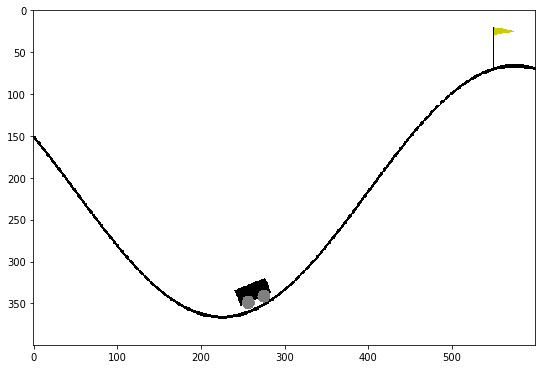

In [13]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('MountainCarContinuous-v0')
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()

The MountainCarContinuous environment provides an out-of-the-box model of a car that needs to use the momentum to get on top of the hill. That is very similar to what a skateboarder needs to do in order to skate to the top of the half-pipe wall. The difference is that the built-in environment includes the notion of power (that is the car is said to be underpowered, but still powered), obviously our skateboarder needs to use his body to create the momentum. In skateboarding, surfing and other sports this is often called 'pumping', by crouching down and then extending, the athlete is able to increase his velocity. For the purpose of our exercise, we can say that the ability to 'pump' provides a mechanical equivalent of the engine. In the following chapters I will show how to train a model that uses Reinforcement Learning to solve the problem of half-pipe.

Summary
=======

Physics principles describe motion and provide an analytical foundation for biomechanics, the science that studies human movement. In this chapter we had an overview of classical mechanics: kinetics and kinematics to analyze movement in sports, including linear and angular laws of motion, potential and kinematic energy. Practical projects included in accompanying notebooks for this chapter include code for examples in kinematics of projectile movement, a machine learning model that predicts a projectile using neural networks, mechanical analysis of figure skater spinning and applications of reinforcement learning for skateboarding, snowboarding, surfing and skiing.

Machine learning in practical sports is a relative newcomer, the way we teach sport science today will be changing a lot in the years to come, thanks to evolution of machine learning models, tools and accuracy that's happening in data science and the field. In order for us to build models for sports motion and movement, understanding physics principles of motion is essential.